In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DATADIR = '/content/drive/MyDrive/Colab Notebooks/CASIA_V1/CASIA_Normalized_Iris'

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [ ]:
img_data_list1=[]
img_data_list2=[]
img_data_list3=[]
img_data_list4=[]

label_list1=[]
label_list2=[]
label_list3=[]
label_list4=[]

count = 0
for img in os.listdir(DATADIR):
  img_array = cv2.imread(os.path.join(DATADIR,img))
  new_array = cv2.resize(img_array,(150,200))
  img_tensor = image.img_to_array(new_array)
  if img[4:5]=='0' or img[4:5]=='6':
    img_data_list1.append(img_tensor)
    label_list1.append(img[0:3])
  if img[4:5]=='1' or img[4:5]=='5':
    img_data_list2.append(img_tensor)
    label_list2.append(img[0:3])
  if img[4:5]=='2' or img[4:5]=='4':
    img_data_list3.append(img_tensor)
    label_list3.append(img[0:3])
  if img[4:5]=='3':
    img_data_list4.append(img_tensor)
    label_list4.append(img[0:3])

In [ ]:
train_img = np.array(img_data_list1)
train_img = np.append(train_img,np.array(img_data_list2),axis=0)
train_img = np.append(train_img,np.array(img_data_list3),axis=0)

train_img/=255

train_label = np.array(label_list1)
train_label = np.append(train_label,np.array(label_list2),axis=0)
train_label = np.append(train_label,np.array(label_list3),axis=0)

test_img = np.array(img_data_list3)

test_img/=255

test_label = np.array(label_list3)

validate_img = np.array(img_data_list4)

validate_img/=255

validate_label = np.array(label_list4)

In [ ]:
print(train_img.shape,validate_img.shape)

(648, 200, 150, 3) (108, 200, 150, 3)


In [ ]:
train_label = np.array(train_label)
test_label = np.array(test_label)
train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
validate_label = to_categorical(validate_label)
num_classes = train_label.shape[1]
print('data normalized and hot encoded')
print(num_classes)

data normalized and hot encoded
109


In [ ]:
print('after conversion to one-hot:',train_label[0])

after conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

In [ ]:
chanDim = -1
model = Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=(200,150,3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
        
#Second conv => relu => con => relu => pool layer set
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
        
# first(and only) set of FC => RELU layers
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#softmax classifier
model.add(Dense(109))
model.add(Activation("softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 150, 32)      896       
_________________________________________________________________
activation_6 (Activation)    (None, 200, 150, 32)      0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 200, 150, 32)      128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 150, 32)      9248      
_________________________________________________________________
activation_7 (Activation)    (None, 200, 150, 32)      0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 200, 150, 32)      128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 75, 32)      

In [ ]:
epochs=50
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate,momentum=0.9,decay=decay,nesterov=False)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [ ]:
model.fit = model.fit(train_img,train_label,validation_data=(validate_img,validate_label),epochs=epochs,batch_size=16)

Epoch 1/50
41/41 [==============================] - 2s 39ms/step - loss: 3.9710 - accuracy: 0.2551 - val_loss: 120.8267 - val_accuracy: 0.0093
Epoch 2/50
41/41 [==============================] - 1s 31ms/step - loss: 0.2612 - accuracy: 0.9644 - val_loss: 15.2138 - val_accuracy: 0.0648
Epoch 3/50
41/41 [==============================] - 1s 31ms/step - loss: 0.1487 - accuracy: 0.9827 - val_loss: 1.5868 - val_accuracy: 0.5648
Epoch 4/50
41/41 [==============================] - 1s 31ms/step - loss: 0.0296 - accuracy: 0.9968 - val_loss: 0.4509 - val_accuracy: 0.9815
Epoch 5/50
41/41 [==============================] - 1s 31ms/step - loss: 0.0967 - accuracy: 0.9872 - val_loss: 0.3132 - val_accuracy: 0.9907
Epoch 6/50
41/41 [==============================] - 1s 32ms/step - loss: 0.0491 - accuracy: 0.9924 - val_loss: 0.2999 - val_accuracy: 0.9907
Epoch 7/50
41/41 [==============================] - 1s 31ms/step - loss: 0.0911 - accuracy: 0.9869 - val_loss: 0.2069 - val_accuracy: 0.9907
Epoch 8/50

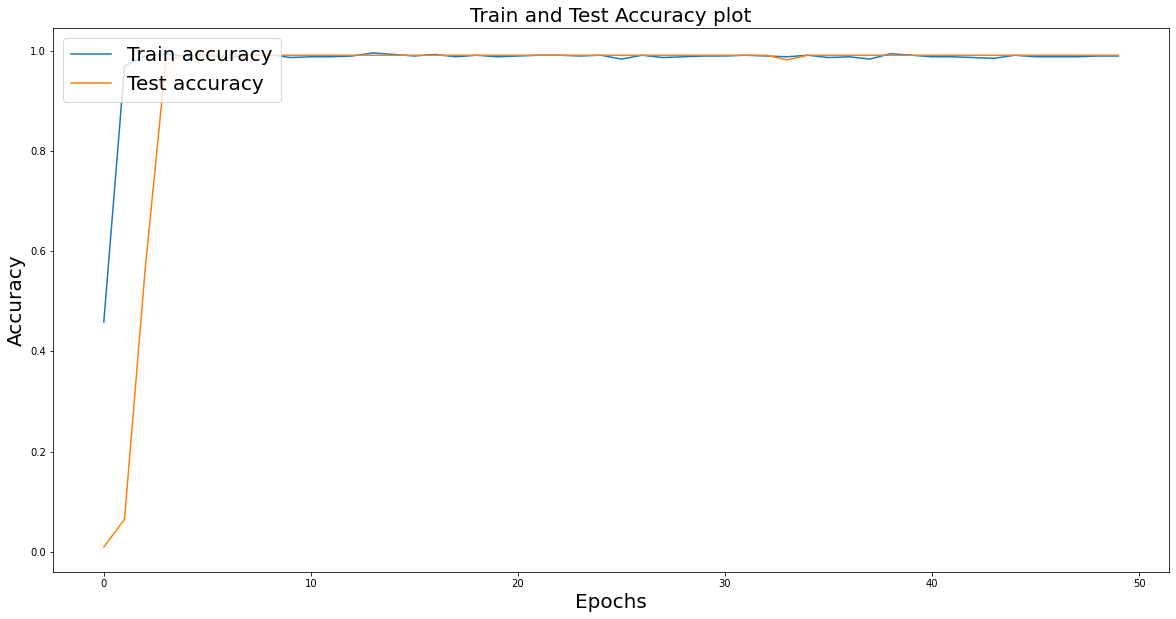

In [ ]:
train_loss = model.fit.history['loss']
val_loss = model.fit.history['val_loss']
train_acc = model.fit.history['accuracy']
val_acc = model.fit.history['val_accuracy']
xc = range(epochs)

plt.figure(figsize=(20,10))
plt.plot(range(50),train_acc,label = 'Train accuracy')
plt.plot(range(50),val_acc,label='Test accuracy')
plt.legend(loc='upper left',prop={'size':20})
plt.title('Train and Test Accuracy plot',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Accuracy',size=20)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/PRE_TRAINED_MODEL/accururacy.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
l=model.predict(validate_img)
v=[]
for i in l:
  v.append(i.argmax())

In [ ]:
v1=[]
for i in validate_label:
  v1.append(i.argmax())

In [ ]:
print(len(v))
print(len(v1))

108
108


AxesImage(54,36;334.8x217.44)


Text(0.5, 15.0, 'Predicted label')

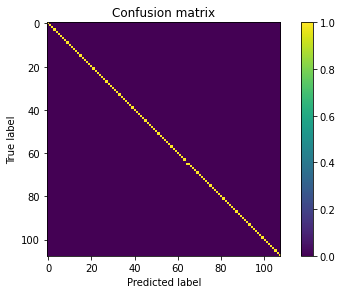

In [ ]:
print(plt.imshow(confusion_matrix(v,v1),interpolation='nearest'))
plt.title("Confusion matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(v,v1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
